In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t
import matplotlib.pyplot as plt

In [2]:
n = 50
C = 4

CSV = {
    "K0": pd.read_csv("K0.csv").fillna(0),          # K = 0 and p = 0.5
    "K1000": pd.read_csv("K1000.csv").fillna(0),    # K = 1000 and p = 0.5
    "p0": pd.read_csv("p0.csv").fillna(0),          # K = NA and p = 0.0
    "p1": pd.read_csv("p1.csv").fillna(0),          # K = NA and p = 1.0
}

for key in CSV:
    CSV[key] = CSV[key][CSV[key]["type"] == "scalar"]
    CSV[key] = CSV[key][CSV[key]["module"].str.contains("SuperMarket.checkout.queues")]
    CSV[key] = CSV[key][CSV[key]["name"] == "queueLength:timeavg"]

degeneracy = {}

Q = []
for i in range(C):
    Q.append(f"Q{i}")

for key in CSV:
    degeneracy[key] = pd.DataFrame(columns=Q)
    for i in range(C):
        temp = []
        temp = [CSV[key]["value"].values[j*C + i] for j in range(n)]
        string = f"Q{i}"
        temp = list(map(float, temp))
        degeneracy[key][string] = temp
    



In [20]:
# K = 0 and p = 0.5
degeneracy["K0"].describe()

,Q0,Q1,Q2,Q3
count,50.0,50.0,50.000000,50.000000
mean,0.0,0.0,11.085364,10.616172
std,0.0,0.0,5.509013,5.504796
min,0.0,0.0,3.844780,3.327018
25%,0.0,0.0,6.644954,6.168581
50%,0.0,0.0,9.450490,9.019298
75%,0.0,0.0,15.430350,14.978405
max,0.0,0.0,23.462923,23.005834


In [11]:
# K = 1000 and p = 0.5
degeneracy["K1000"].describe()

,Q0,Q1,Q2,Q3
count,50.000000,50.000000,50.0,50.0
mean,11.085364,10.616172,0.0,0.0
std,5.509013,5.504796,0.0,0.0
min,3.844780,3.327018,0.0,0.0
25%,6.644954,6.168581,0.0,0.0
50%,9.450490,9.019298,0.0,0.0
75%,15.430350,14.978405,0.0,0.0
max,23.462923,23.005834,0.0,0.0


In [12]:
# K = NA and p = 0.0
degeneracy["p0"].describe()

,Q0,Q1,Q2,Q3
count,50.000000,50.000000,50.000000,50.000000
mean,0.591897,0.353298,0.151700,0.044791
std,0.018998,0.018494,0.017024,0.009534
min,0.552864,0.315233,0.111576,0.028056
25%,0.577971,0.340720,0.139342,0.038466
50%,0.593409,0.350962,0.155699,0.043345
75%,0.602701,0.365281,0.161488,0.050817
max,0.639544,0.389481,0.192550,0.070899


In [13]:
# K = NA and p = 1.0
degeneracy["p1"].describe()

,Q0,Q1,Q2,Q3
count,50.000000,50.000000,50.000000,50.000000
mean,0.591897,0.353298,0.151700,0.044791
std,0.018998,0.018494,0.017024,0.009534
min,0.552864,0.315233,0.111576,0.028056
25%,0.577971,0.340720,0.139342,0.038466
50%,0.593409,0.350962,0.155699,0.043345
75%,0.602701,0.365281,0.161488,0.050817
max,0.639544,0.389481,0.192550,0.070899


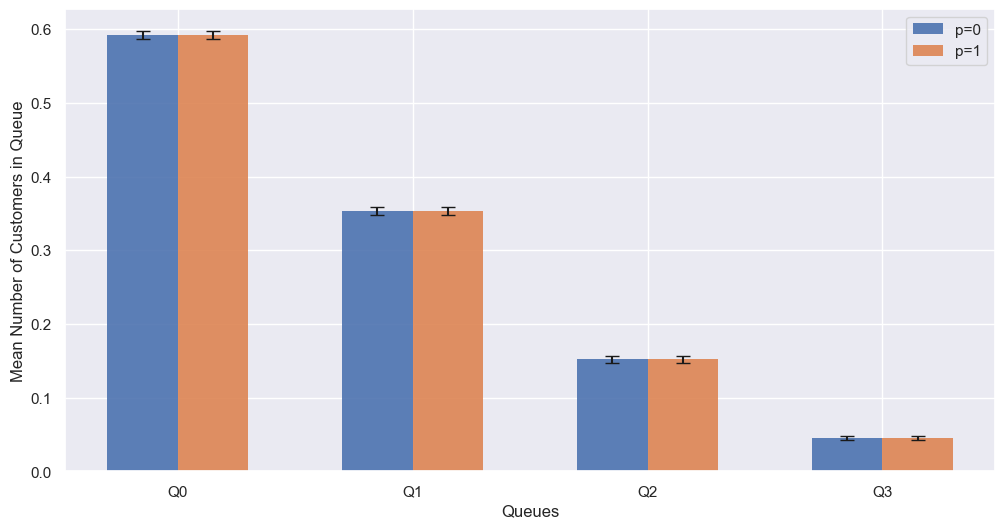

In [25]:
# (BarPlot) Mean Number of Customers in Queue in the following configurations:
configurations = ["p0", "p1"]

# width of the bars
barWidth = 0.3

sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))

rx = np.arange(len(Q))

for cc in configurations:

    # We save in y_V all the values for the current cc
    y_V = []

    # Confidence Interval Bounds
    y_err = []

    for q in Q:

        y_V.append(degeneracy[cc][q].mean())

        y_err.append(1.96 * (degeneracy[cc][q].std() / math.sqrt(n)))

    plt.bar(rx, y_V, width = barWidth, edgecolor = 'black', yerr=y_err, capsize=5, label=f"p={cc[1]}", lw=0, alpha=0.9)
    rx = [x + barWidth for x in rx]


# Set the x-axis limits
# plt.xlim(0, 40)  
# Set the y-axis limits
# plt.ylim(0, 900)  

plt.xticks([r + barWidth/2 for r in range(len(Q))], Q)
# plt.title('Bar Plot with CIs for Mean Number of Customers in Queue')
plt.xlabel('Queues')
plt.ylabel('Mean Number of Customers in Queue')

plt.legend()
plt.show()